<a href="https://colab.research.google.com/github/bruAristimunha/miningAbandonment/blob/master/Analise_de_quais_mat%C3%A9rias_cada_aluno_cursou_Ci%C3%AAncia_da_Computa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [0]:
from google.colab import files

bcc = files.upload()


Saving bcc.csv to bcc.csv


In [0]:
dados =  pd.read_csv("bcc.csv",sep=";")
dados.columns

Index(['ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'NOME_DISCIPLINA',
       'COD_DISCIPLINA', 'CATEGORIA', 'A', 'B', 'C', 'D', 'F', 'O'],
      dtype='object')

In [0]:
conceitos = dados.drop(['ID DO ALUNO', 'ANO', 'QUADRIMESTRE', 'NOME_DISCIPLINA', 'COD_DISCIPLINA', 'CATEGORIA'],axis=1).copy()
identificacao = dados.drop(['A','B','C','D','F','O'],axis=1).copy()
conceitos = conceitos.fillna(0)
identificacao = identificacao.fillna(method='ffill')

In [0]:
tratado = pd.concat([identificacao,conceitos],axis=1)
tratado['APROVADOS'] = tratado.A + tratado.B + tratado.C + tratado.D
tratado['NOME_DISCIPLINA'] = tratado['NOME_DISCIPLINA'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [0]:
a = tratado.groupby(['NOME_DISCIPLINA'])['A','B','C','D','F','O'].apply(sum)
a['APROVADOS'] = a.A + a.B + a.C + a.D
a['ABANDONO'] = a.O
a['REPROVACAO'] = a.F

In [0]:
b = a.drop(['A','B','C','D','F','O'],axis=1).copy()



In [0]:
b['LIMITADAS'] = b['NOME_DISCIPLINA'].isin(disc['NOME'])

In [0]:
disc_01['Nome'] = disc_01['Nome'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


b['OBRIGATORIAS'] = b['NOME_DISCIPLINA'].isin(disc_01['Nome'])

In [0]:
b.OBRIGATORIAS = b.OBRIGATORIAS.replace(True,"OBR")
b.OBRIGATORIAS = b.OBRIGATORIAS.replace(False,"")
b.LIMITADAS = b.LIMITADAS.replace(True,"LIM")
b.LIMITADAS = b.LIMITADAS.replace(False,"")

In [0]:
b['CATEGORIA'] = b['OBRIGATORIAS'] + b['LIMITADAS']
b['CATEGORIA'] = b['CATEGORIA'].replace("","LIV")

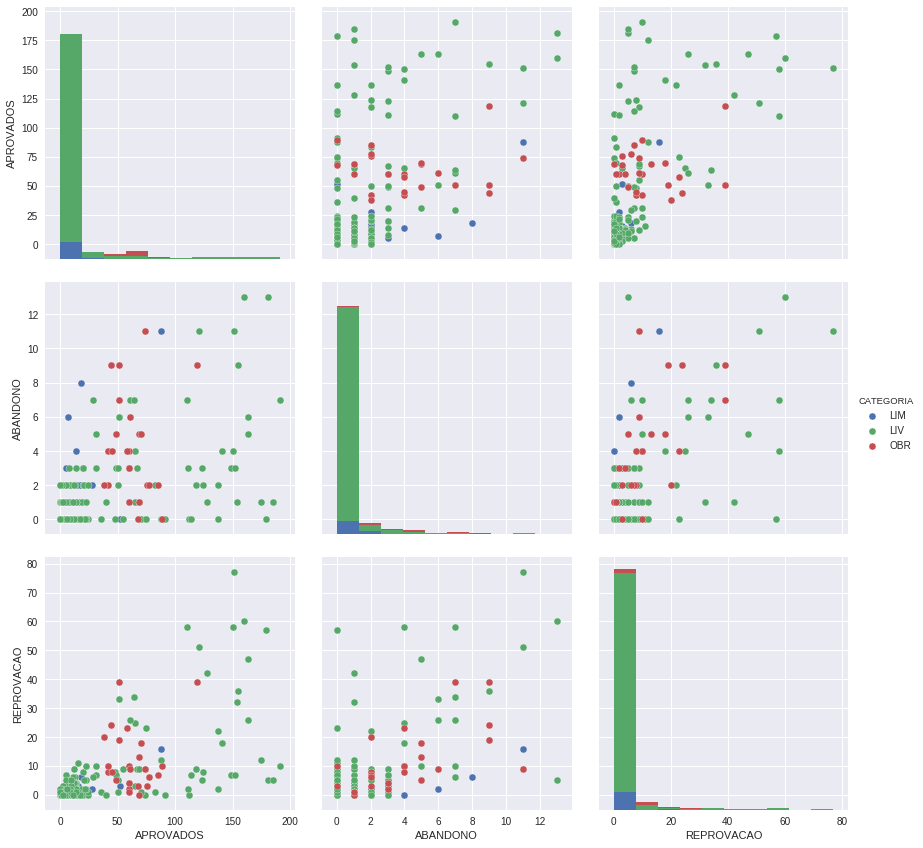

In [0]:

b.sort_values('APROVADOS',ascending=False )


sns.pairplot(b, hue="CATEGORIA",size=4)

In [0]:
b = b.drop("LIMITADAS",1)
b = b.drop("OBRIGATORIAS",1)

In [0]:
b['CATEGORIA'] = b['CATEGORIA'].astype('category')

In [0]:
#files.upload()

disc_01 = pd.read_csv("obrigatoriasBCC.csv")

len(disc_01)

26

In [0]:
disc_01.head()

,Sigla,Nome,T,P,I,Créditos,Tipo
0,MCTA009-13,Computadores Ética e Sociedade,2.0,0.0,4.0,2,OBCC
1,MCTB001-17,Álgebra Linear,6.0,0.0,5.0,6,OBCC
2,MCTA001-17,Algoritmos e Estruturas de Dados I,2.0,2.0,4.0,4,OBCC
3,MCTA003-17,Análise de Algoritmos,4.0,0.0,4.0,4,OBCC
4,MCTA006-17,Circuitos Digitais,3.0,1.0,4.0,4,OBCC


In [0]:
files.upload()

disc = pd.read_csv("limitadasBCC.csv")
len(disc)

Saving limitadasBCC.csv to limitadasBCC.csv


70

In [0]:
disc.columns = ['CODIGO','NOME','T','P','I','CRED','CAT']

In [0]:
disc['NOME'] = disc['NOME'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [0]:
b = b.reset_index()

In [0]:
disciplinas = b[b['NOME_DISCIPLINA'].isin(disc['NOME'])]

In [0]:
disciplinas = disciplinas.reset_index().drop('index',axis=1).sort_values('APROVADOS',ascending=False )

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


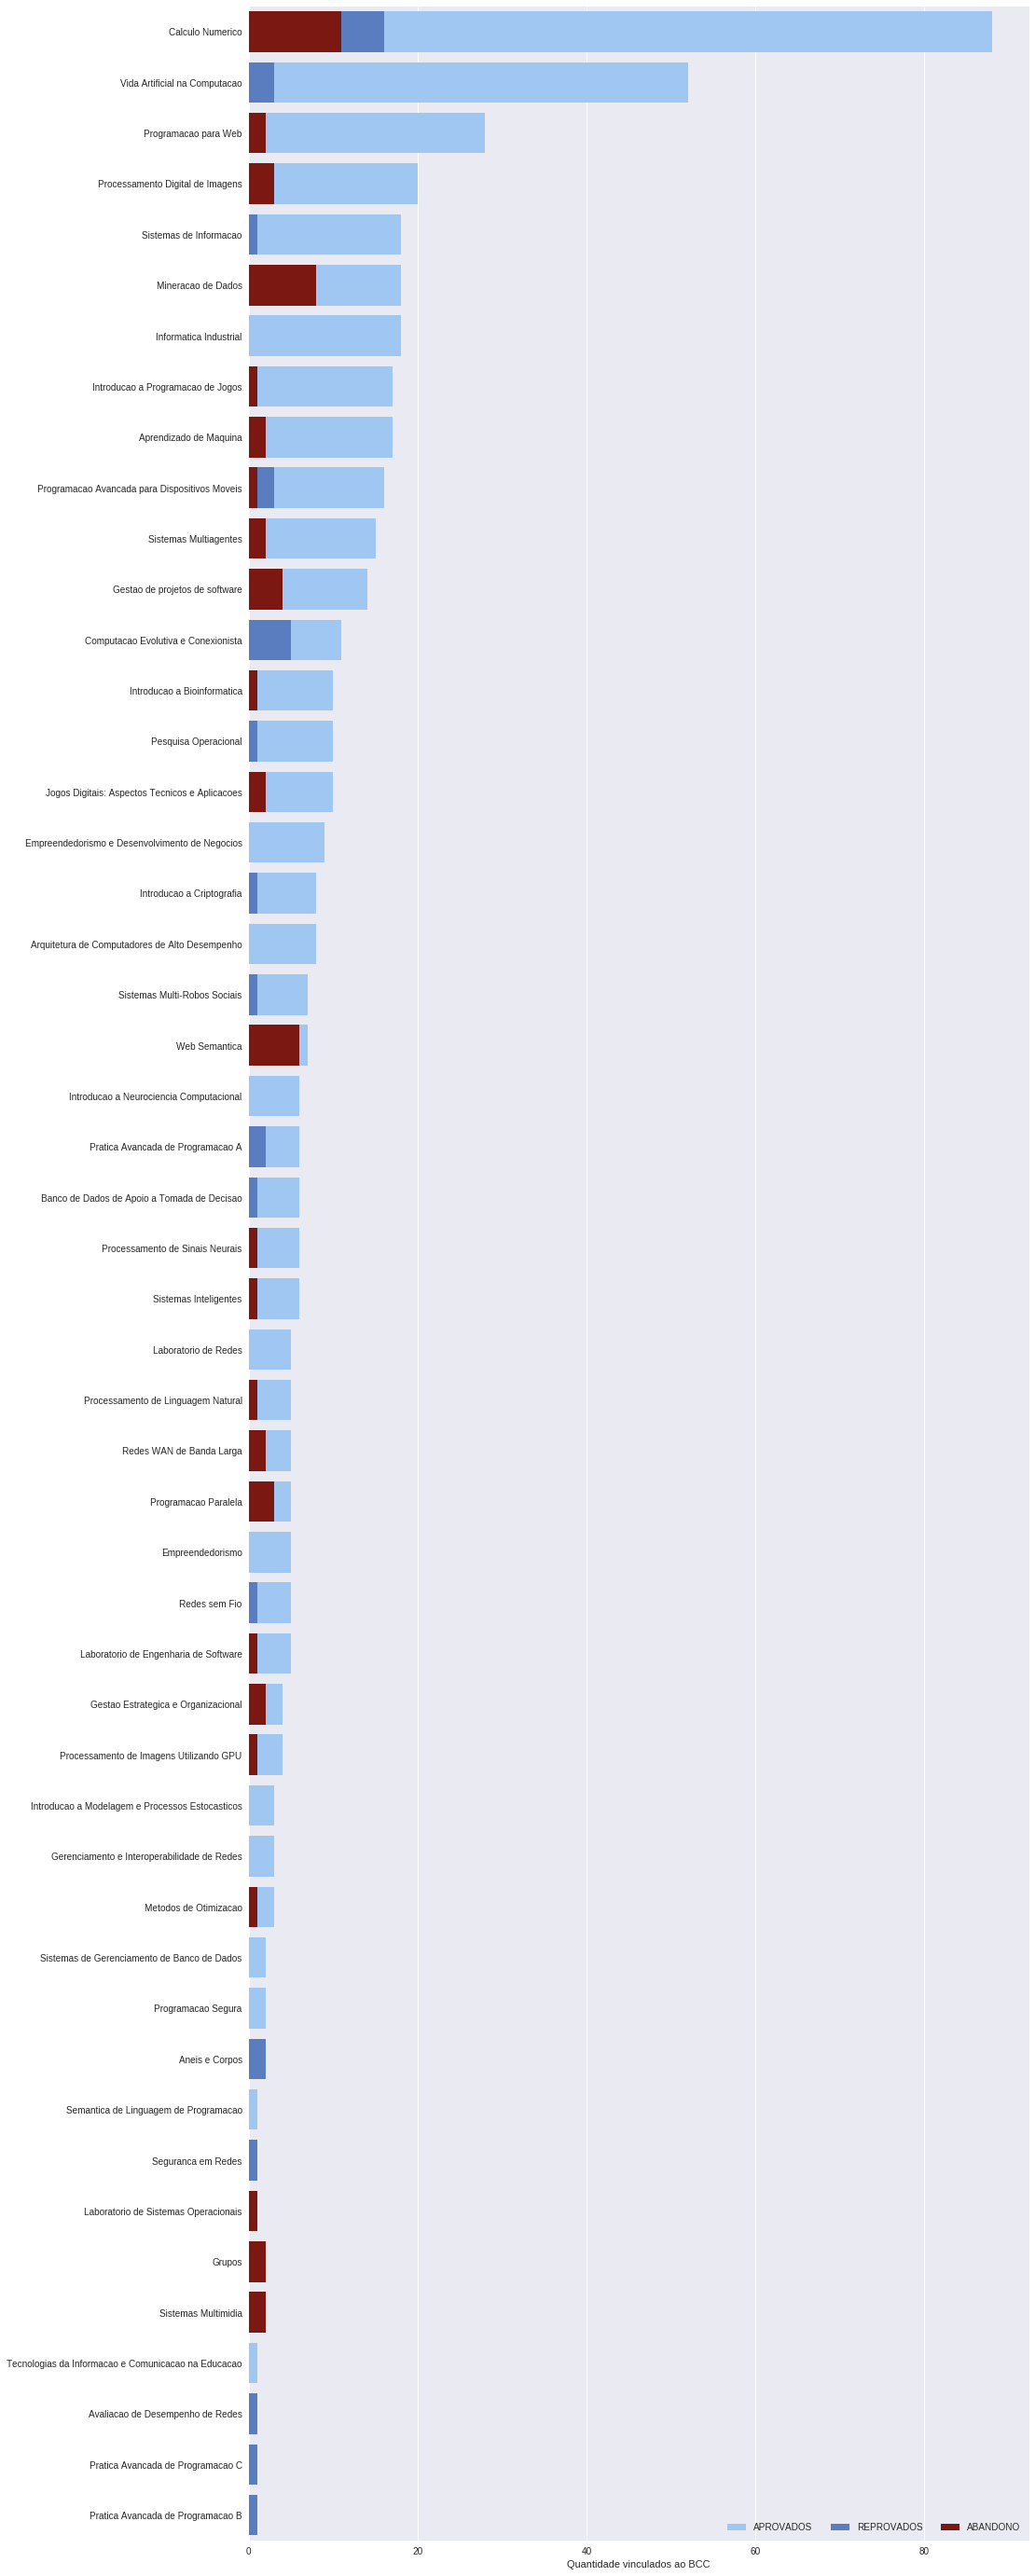

In [0]:
f, ax = plt.subplots(figsize=(15,50))

sns.set_color_codes("pastel")
sns.barplot(x="APROVADOS", y="NOME_DISCIPLINA", data=disciplinas,
            label="APROVADOS", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="REPROVACAO", y="NOME_DISCIPLINA", data=disciplinas,
            label="REPROVADOS", color="b")

sns.set_color_codes("dark")
sns.barplot(x="ABANDONO", y="NOME_DISCIPLINA", data=disciplinas,
            label="ABANDONO", color="r")


ax.legend(ncol=3, loc="lower right")
ax.set(ylabel="", xlabel="Quantidade vinculados ao BCC")
sns.despine(left=True, bottom=True)
